In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [47]:
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [3]:
register_matplotlib_converters()
%matplotlib notebook

In [4]:
### import data

In [5]:
df_name_list = ['df_volume07_18', 'df_shares_out07_18', 'df_returns07_18']
df_list = []


### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


for name in df_name_list:
    file_name = '{}.csv'.format(name)
    key_path = key_location + '/' + file_name

    ### INSTANTIATE DATAFRAME
    csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
    body = csv_obj['Body']
    csv_string = body.read().decode('utf-8')

    temp_df = pd.read_csv(StringIO(csv_string))
    temp_df.index = temp_df['Unnamed: 0']
    temp_df = temp_df.drop('Unnamed: 0', axis=1)
    temp_df.index.names = ['date']


    #df_bidlo.head()
    #### TRANSPOSE DATA FOR EASE OF USE
    temp_df = temp_df.T
    temp_df.index = pd.to_datetime(temp_df.index)
    df_list.append(temp_df)
    print('{} added to df_list'.format(name))
    
    
df_volume = df_list[0]
df_sharesout = df_list[1]
df_returns = df_list[2]
df_volume_sharesout = df_volume/df_sharesout
df_volume_sharesout.head()

df_volume07_18 added to df_list
df_shares_out07_18 added to df_list
df_returns07_18 added to df_list


date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,ROST_ROSS STORES INC,IPGP_I P G PHOTONICS CORP,UNH_UNITED HEALTHCARE,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,10.086824,7.940110,9.832405,4.292783,11.230042,12.616163,5.140269,3.360915,19.115815,5.625910,...,17.344260,4.507902,6.207368,24.278818,6.527692,29.951077,11.915006,11.933391,4.433172,28.184532
2007-01-04,6.752488,4.771500,6.034454,3.221271,6.758504,11.887417,13.501441,2.520868,17.413761,5.842426,...,10.888471,5.906764,3.826737,11.643597,4.962741,15.252900,9.329856,43.659223,5.562144,25.573948
2007-01-05,6.524671,4.570107,6.487013,3.717162,8.821963,6.519232,6.653919,2.476282,10.512557,4.545278,...,13.501027,4.479768,4.614490,18.791439,3.940352,14.943581,6.177439,34.527627,9.008837,27.614654
2007-01-08,5.985666,5.320853,4.812606,3.170935,7.444092,5.175854,5.376684,3.744140,12.862963,4.979867,...,9.609464,1.918256,3.225028,13.019076,5.795234,15.570899,6.912963,14.611127,4.362967,15.549525
2007-01-09,6.062494,4.572778,5.322358,3.727940,7.792364,5.714403,3.764249,2.927815,14.650364,7.504848,...,10.358600,2.776374,4.071282,11.989648,5.053451,10.221731,5.619787,8.418742,4.517417,31.023066


### Dictionary of Positive/Negative Returns for each stock

In [6]:
# high_returns = {}
# low_returns = {}

# for symbol in df_returns.columns:
#     temp_series = df_returns[symbol]
#     temp_series_high = temp_series[temp_series>0.03]
#     temp_series_low = temp_series[temp_series<=-0.03]    
#     high_returns[symbol] = temp_series_high
#     low_returns[symbol] = temp_series_low


# print(len(high_returns), len(low_returns))    
# print(len(high_returns['ORCL_ORACLE CORP']), len(low_returns['ORCL_ORACLE CORP']))

### what are the dates of those returns?

In [7]:
# vs_high_returns = {}
# vs_low_returns = {}
# for symbol in df_returns.columns:
#     temp_high = high_returns[symbol]
#     temp_low = low_returns[symbol]
    
#     temp_high = pd.merge(temp_high, df_volume_sharesout[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
#     temp_low = pd.merge(temp_low, df_volume_sharesout[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
    
#     vs_high_returns[symbol] = temp_high
#     vs_low_returns[symbol] = temp_low

# print(len(vs_high_returns['ADM_ARCHER DANIELS MIDLAND CO']), len(vs_low_returns['ADM_ARCHER DANIELS MIDLAND CO']))

### Dictionary of Correlations

In [8]:
# # cor_high = {}
# # cor_low = {}
# corrs = {}

# for symbol in df_returns.columns:
#     ret_high = high_returns[symbol]
#     vs_high = vs_high_returns[symbol]

#     ret_low = low_returns[symbol]
#     vs_low = vs_low_returns[symbol]    
    
#     temp_corr_high = np.corrcoef(ret_high, vs_high)[0, 1]
#     temp_corr_low = np.corrcoef(ret_low, vs_low)[0, 1]    
#     corrs[symbol] = [temp_corr_high, temp_corr_low]
#     #cor_low[symbol] = [temp_corr_low, temp_corr_low]


# corrs['ADM_ARCHER DANIELS MIDLAND CO']

In [9]:
# high_corrs = []
# low_corrs = []
# for key, value in corrs.items():
#     high_corrs.append(value[0])
#     low_corrs.append(value[1])

    
# plt.hist(high_corrs, label='Positive Return Dates', bins=50)
# plt.hist(low_corrs, label='Negative Return Dates', bins=50)
# plt.legend()
# plt.show()

### Put this into a loop and see if we can find an return threshold for which the correlations (appear) to nudge a little higher

### Distribution of Correlations (are they worth adding to the portfolio of visualizations?)
### Loop over return thresholds

In [16]:
cutoff_list.reshape(2,5)

array([[0.  , 0.01, 0.02, 0.03, 0.04],
       [0.05, 0.06, 0.07, 0.08, 0.09]])

In [82]:
#pd.DataFrame({'here': 1, 'there': 2}, index=[3,4])

<IPython.core.display.Javascript object>


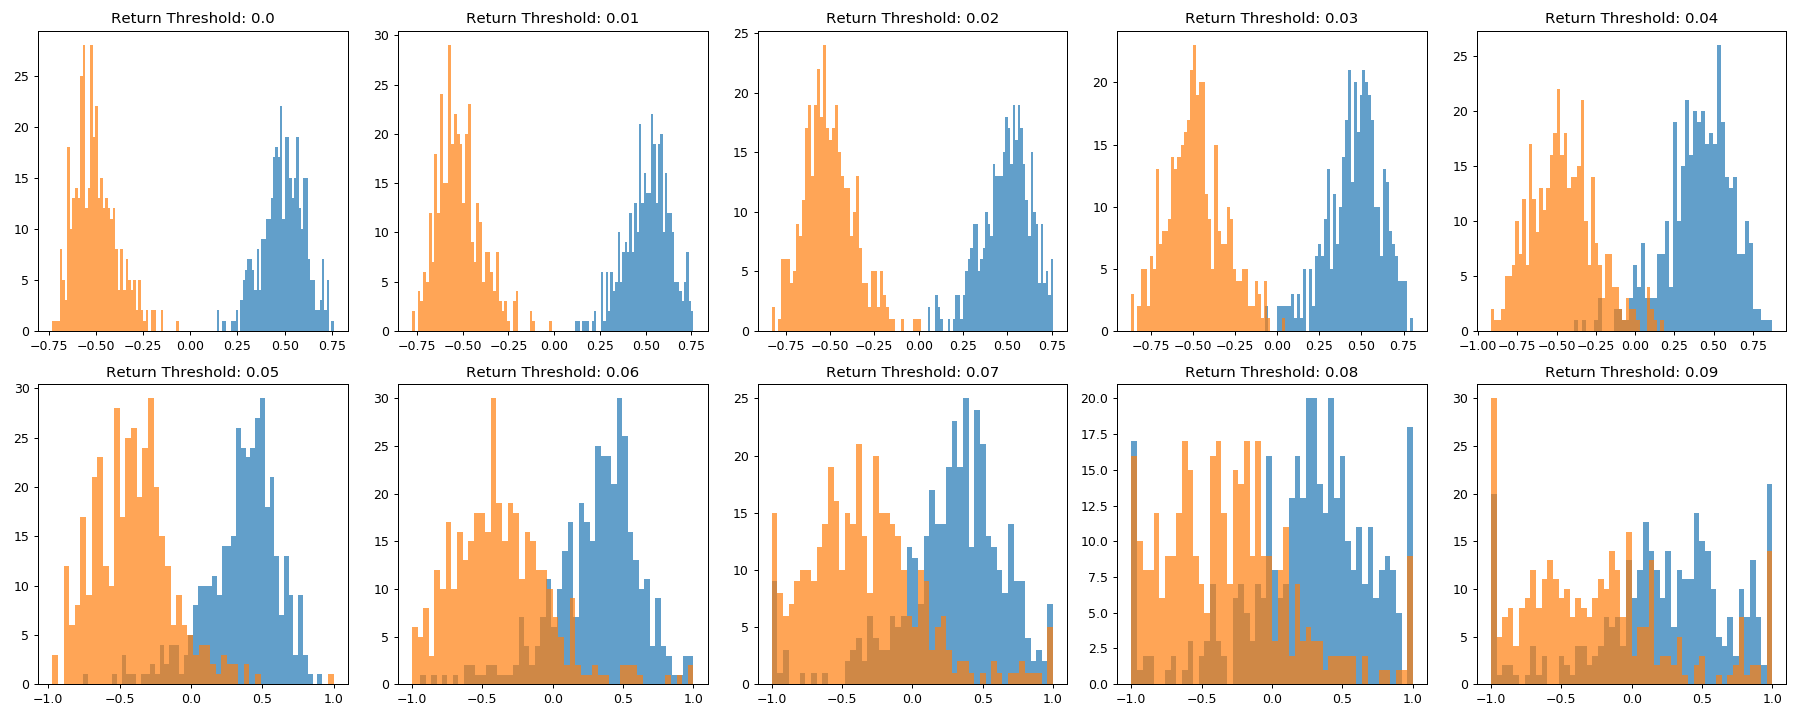

In [24]:
#corr_dataframe = pd.DataFrame()
cutoff_list = np.arange(0,0.1, 0.01)
nrows = 2
ncols = 5
temp_matrix = cutoff_list.reshape(nrows,ncols)


fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
for k in range(nrows):
    for l in range(ncols):
        ## indices
        temp_idx = temp_matrix[k,l]                                              
#for r_cutoff in cutoff_list:
        ### Dictionary of Positive/Negative Returns for each stock
        high_returns = {}
        low_returns = {}
        for symbol in df_returns.columns:
            temp_series = df_returns[symbol]
            temp_series_high = temp_series[temp_series>temp_idx]
            temp_series_low = temp_series[temp_series<=-temp_idx]    
            high_returns[symbol] = temp_series_high
            low_returns[symbol] = temp_series_low


        ### what are the dates of those returns?
        vs_high_returns = {}
        vs_low_returns = {}
        for symbol in df_returns.columns:
            temp_high = high_returns[symbol]
            temp_low = low_returns[symbol]

            temp_high = pd.merge(temp_high, df_volume_sharesout[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
            temp_low = pd.merge(temp_low, df_volume_sharesout[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]

            vs_high_returns[symbol] = temp_high
            vs_low_returns[symbol] = temp_low

        ### Dictionary of Correlations
        corrs = {}
        for symbol in df_returns.columns:
            ret_high = high_returns[symbol]
            vs_high = vs_high_returns[symbol]

            ret_low = low_returns[symbol]
            vs_low = vs_low_returns[symbol]    

            temp_corr_high = np.corrcoef(ret_high, vs_high)[0, 1]
            temp_corr_low = np.corrcoef(ret_low, vs_low)[0, 1]    
            corrs[symbol] = [temp_corr_high, temp_corr_low]

        high_corrs = []
        low_corrs = []
        for key, value in corrs.items():
            high_corrs.append(value[0])
            low_corrs.append(value[1])

        ### plot the histogram
        ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
        ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
        ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
#plt.legend()
plt.tight_layout()
plt.show()    

In [35]:
len(df_returns[df_returns.columns[0]]), len(df_returns[df_returns.columns[0]][5:]), len(df_returns[df_returns.columns[0]][:-5])

(3020, 3015, 3015)

### Get Next Day Dates we're predicting the Return from the VS

In [89]:
dates = df_returns.index
dates_back5 = dates[5:]

### Create the list of dates previous day's trading

In [111]:
dates_back1 = []
for idx in range(1, len(dates)):
    #print(idx)
    dates_back1.append(dates[idx-1])
dates_back1 = pd.to_datetime(dates_back1)

In [112]:
dates_back5 = []
for idx in range(5, len(dates)):
    #print(idx)
    dates_back5.append(dates[idx-5])
dates_back5 = pd.to_datetime(dates_back5)

In [104]:
#len(dates_back1), len(dates_back5)

In [105]:
# day_ahead1 = (df_returns[df_returns.columns[0]].index + pd.Timedelta(days=-1))[1:]

In [70]:
#(df_returns[df_returns.columns[0]].index + pd.Timedelta(days=-5))

In [163]:
df_day_behind1 = pd.DataFrame(dates_back1, index=dates[1:], columns=['Day Behind 1'])
df_day_behind5 = pd.DataFrame(dates_back5, index=dates[5:], columns=['Day Behind 5'])

### 1 Day behind

<IPython.core.display.Javascript object>


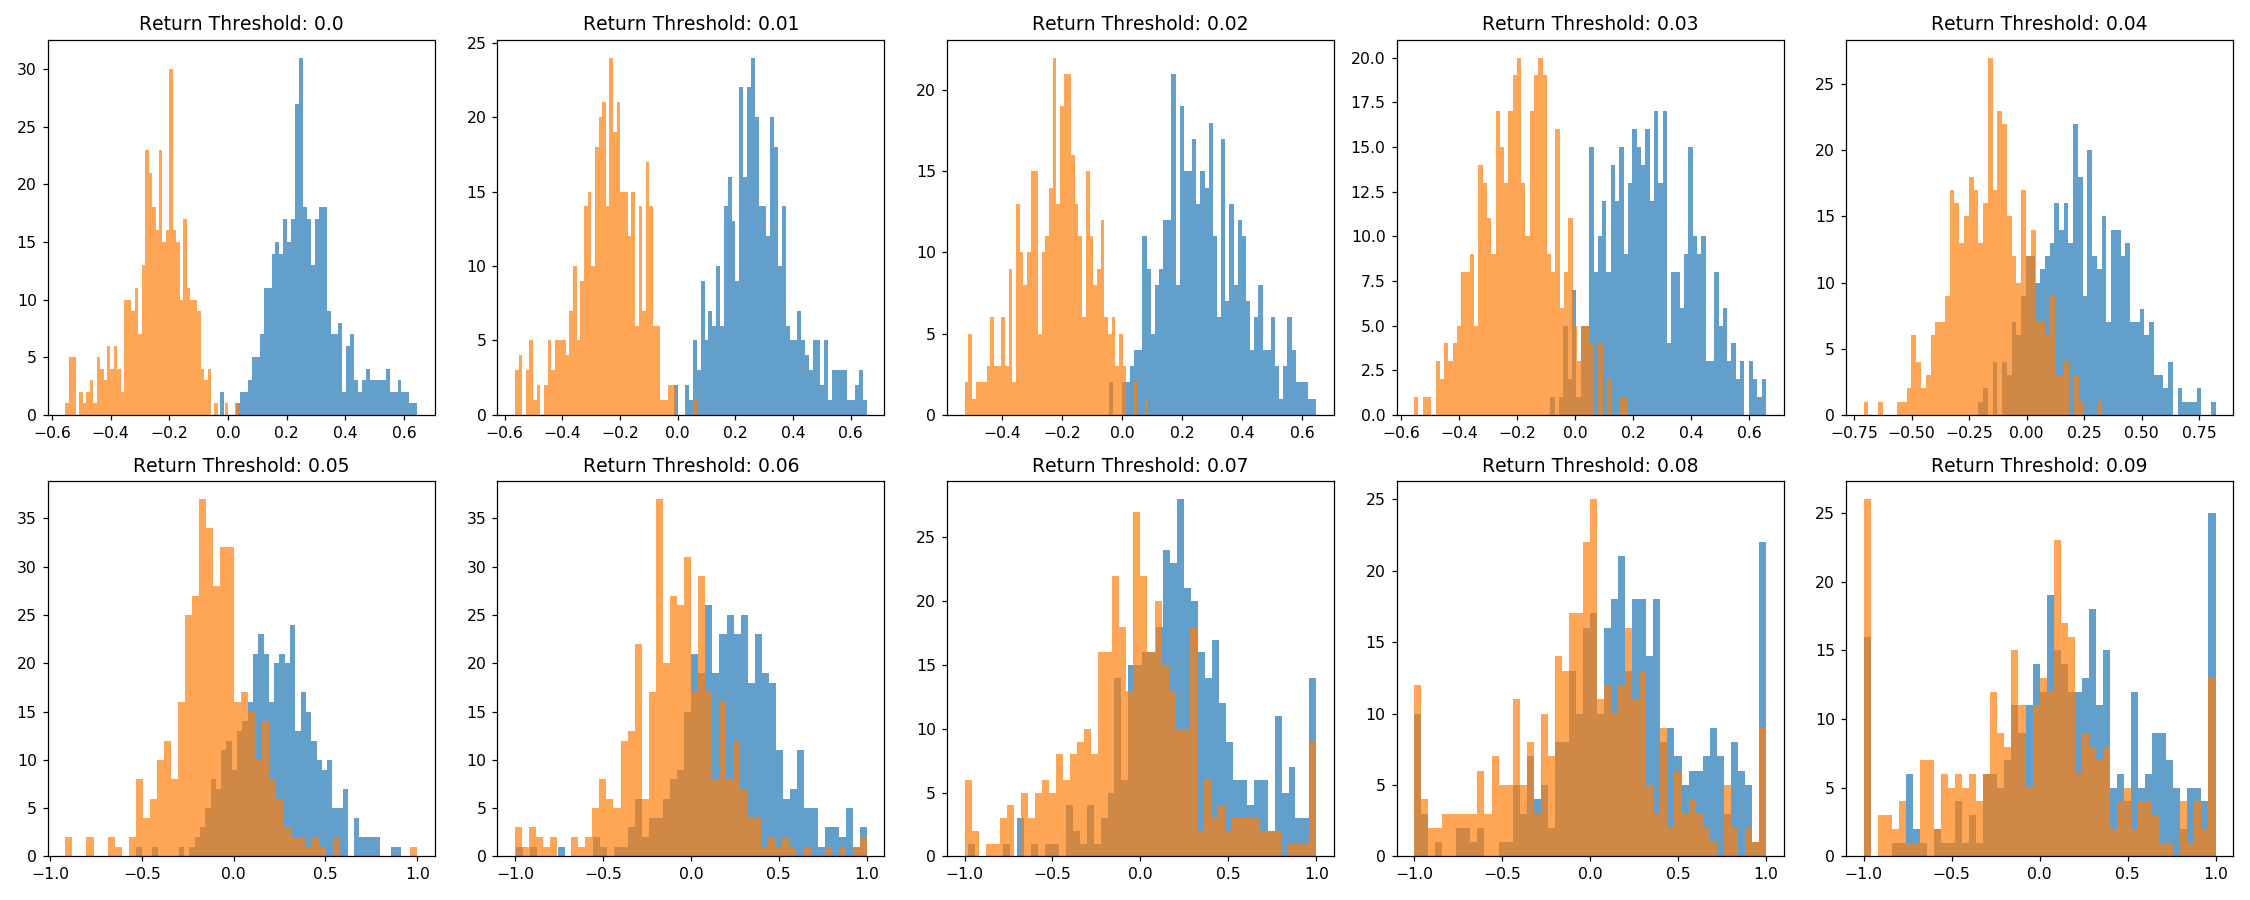

C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [172]:
corr_dataframe = pd.DataFrame()
cutoff_list = np.arange(0,0.1, 0.01)
nrows = 2
ncols = 5
temp_matrix = cutoff_list.reshape(nrows,ncols)

fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
for k in range(nrows):
    for l in range(ncols):
        ## indices
        temp_idx = temp_matrix[k,l]     
        ### Dictionary of high/low returns
        high_returns = {}
        low_returns = {}
        ### Dictionary of Volume_shares returns
        vs_high_returns = {}
        vs_low_returns = {}
        ### Dictionary of Correlations
        corrs = {}
        for symbol in df_returns.columns:
            ###generate returns
            temp_series = df_returns[symbol][1:]
            temp_series_high = temp_series[temp_series>temp_idx]
            temp_series_low = temp_series[temp_series<=-temp_idx]    
            high_returns[symbol] = temp_series_high
            low_returns[symbol] = temp_series_low
            
            #### Select the Volume_sharesout for dates 1 day behind
            temp_high = high_returns[symbol]
            temp_low = low_returns[symbol]

            temp_high = pd.merge(pd.merge(temp_high, df_day_behind1, left_index=True, right_index=True)[[symbol, 'Day Behind 1']], df_volume_sharesout[symbol], 
                     left_on='Day Behind 1', right_index=True, suffixes=('_x', ''))[symbol].values

            temp_low = pd.merge(pd.merge(temp_low, df_day_behind1, left_index=True, right_index=True)[[symbol, 'Day Behind 1']], df_volume_sharesout[symbol], 
                     left_on='Day Behind 1', right_index=True, suffixes=('_x', ''))[symbol].values

            vs_high_returns[symbol] = temp_high
            vs_low_returns[symbol] = temp_low    

            ### Generate the Correlations between the Returns & the Volume/Sharesout on the dates 1 day behind
            ret_high = high_returns[symbol]
            vs_high = vs_high_returns[symbol]

            ret_low = low_returns[symbol]
            vs_low = vs_low_returns[symbol]    

            temp_corr_high = np.corrcoef(ret_high, vs_high)[0, 1]
            temp_corr_low = np.corrcoef(ret_low, vs_low)[0, 1]    
            corrs[symbol] = [temp_corr_high, temp_corr_low]    


        high_corrs = []
        low_corrs = []
        for key, value in corrs.items():
            high_corrs.append(value[0])
            low_corrs.append(value[1])
            
        ### plot the histogram
        ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
        ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
        ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
#plt.legend()
plt.tight_layout()
plt.show()  

### 5 days ahead

<IPython.core.display.Javascript object>


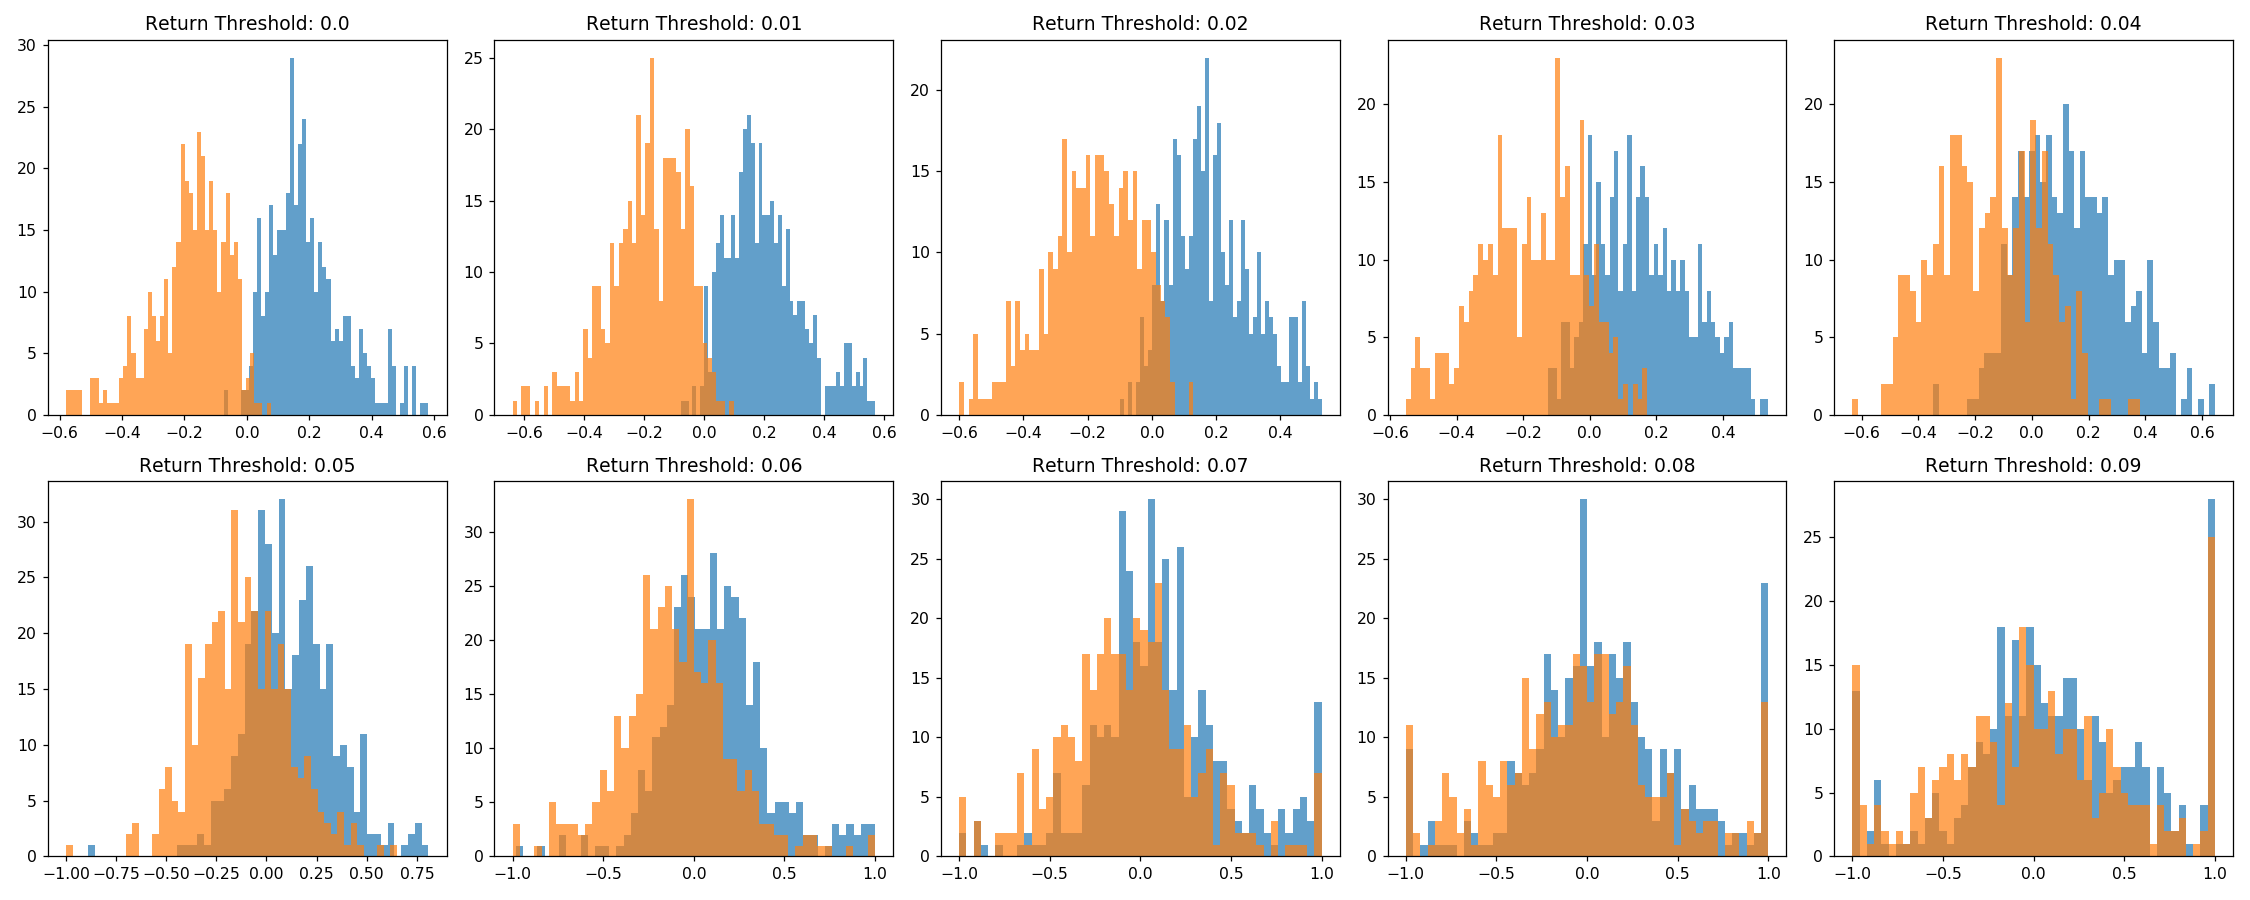

C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: 

In [176]:
corr_dataframe = pd.DataFrame()
cutoff_list = np.arange(0,0.1, 0.01)
nrows = 2
ncols = 5
temp_matrix = cutoff_list.reshape(nrows,ncols)

fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
for k in range(nrows):
    for l in range(ncols):
        ## indices
        temp_idx = temp_matrix[k,l]     
        ### Dictionary of high/low returns
        high_returns = {}
        low_returns = {}
        ### Dictionary of Volume_shares returns
        vs_high_returns = {}
        vs_low_returns = {}
        ### Dictionary of Correlations
        corrs = {}
        for symbol in df_returns.columns:
            ###generate returns
            temp_series = df_returns[symbol][5:]
            temp_series_high = temp_series[temp_series>temp_idx]
            temp_series_low = temp_series[temp_series<=-temp_idx]    
            high_returns[symbol] = temp_series_high
            low_returns[symbol] = temp_series_low
            
            #### Select the Volume_sharesout for dates 1 day behind
            temp_high = high_returns[symbol]
            temp_low = low_returns[symbol]

            temp_high = pd.merge(pd.merge(temp_high, df_day_behind5, left_index=True, right_index=True)[[symbol, 'Day Behind 5']], df_volume_sharesout[symbol], 
                     left_on='Day Behind 5', right_index=True, suffixes=('_x', ''))[symbol].values

            temp_low = pd.merge(pd.merge(temp_low, df_day_behind5, left_index=True, right_index=True)[[symbol, 'Day Behind 5']], df_volume_sharesout[symbol], 
                     left_on='Day Behind 5', right_index=True, suffixes=('_x', ''))[symbol].values

            vs_high_returns[symbol] = temp_high
            vs_low_returns[symbol] = temp_low    

            ### Generate the Correlations between the Returns & the Volume/Sharesout on the dates 1 day behind
            ret_high = high_returns[symbol]
            vs_high = vs_high_returns[symbol]

            ret_low = low_returns[symbol]
            vs_low = vs_low_returns[symbol]    

            temp_corr_high = np.corrcoef(ret_high, vs_high)[0, 1]
            temp_corr_low = np.corrcoef(ret_low, vs_low)[0, 1]    
            corrs[symbol] = [temp_corr_high, temp_corr_low]    


        high_corrs = []
        low_corrs = []
        for key, value in corrs.items():
            high_corrs.append(value[0])
            low_corrs.append(value[1])
            
        ### plot the histogram
        ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
        ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
        ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
#plt.legend()
plt.tight_layout()
plt.show()  

In [174]:
#df_day_behind5

### Get the dates of the volume relative to the 5 days behind the returns

### Now repeat for 1 day after
### How does the VS correlate with the returns the following day?

In [ ]:
# corr_dataframe = pd.DataFrame()
# cutoff_list = np.arange(0,0.1, 0.01)
# nrows = 2
# ncols = 5
# temp_matrix = cutoff_list.reshape(nrows,ncols)


# fig, ax = plt.subplots(nrows,ncols, figsize=(20,8))
# for k in range(nrows):
#     for l in range(ncols):
#         ## indices
#         temp_idx = temp_matrix[k,l]                                              
# #for r_cutoff in cutoff_list:
#         ### Dictionary of Positive/Negative Returns for each stock
#         high_returns = {}
#         low_returns = {}
#         for symbol in df_returns.columns:
#             temp_series = df_returns[symbol]
#             temp_series_high = temp_series[temp_series>temp_idx]
#             temp_series_low = temp_series[temp_series<=-temp_idx]    
#             high_returns[symbol] = temp_series_high
#             low_returns[symbol] = temp_series_low


#         ### what are the dates of those returns?
#         vs_high_returns = {}
#         vs_low_returns = {}
#         for symbol in df_returns.columns:
#             temp_high = high_returns[symbol]
#             temp_low = low_returns[symbol]

#             temp_high = pd.merge(temp_high, df_volume_sharesout[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]
#             temp_low = pd.merge(temp_low, df_volume_sharesout[symbol], left_index=True, right_index=True, copy=False, suffixes=('_x', ''))[symbol]

#             vs_high_returns[symbol] = temp_high
#             vs_low_returns[symbol] = temp_low

#         ### Dictionary of Correlations
#         corrs = {}
#         for symbol in df_returns.columns:
#             ret_high = high_returns[symbol]
#             vs_high = vs_high_returns[symbol]

#             ret_low = low_returns[symbol]
#             vs_low = vs_low_returns[symbol]    

#             temp_corr_high = np.corrcoef(ret_high, vs_high)[0, 1]
#             temp_corr_low = np.corrcoef(ret_low, vs_low)[0, 1]    
#             corrs[symbol] = [temp_corr_high, temp_corr_low]

#         high_corrs = []
#         low_corrs = []
#         for key, value in corrs.items():
#             high_corrs.append(value[0])
#             low_corrs.append(value[1])

#         ### plot the histogram
#         ax[k,l].hist(high_corrs, label='Positive Return Dates', bins=50, alpha=0.7)
#         ax[k,l].hist(low_corrs, label='Negative Return Dates', bins=50, alpha=0.7)
#         ax[k,l].set_title('Return Threshold: {}'.format(temp_idx))
# #plt.legend()
# plt.tight_layout()
# plt.show()    

### Now repeat for 5 days after

## This begs the question: For the higher values of r:
### 1) What companies had net correlations <-0.8? 
### 2) For each of those companies, what were the dates? How many dates? Do they coincide with the Systemically poor dates?

### plot

In [11]:
# #sup_title_font =15
# sub_title_font =10
# title_font = 10
# legend_font =8
# axis_font = 8
# tick_rotation = 20
# black_dot = 2
# red_dot = 5


# ### matrix of subplots
# n_cols = 2
# n_rows = 16
# #n_plots = n_cols*n_rows
# nloops = int(np.floor(388/n_rows))#sup_title_font =15
# sub_title_font =8
# legend_font =8
# axis_font = 6
# tick_rotation = 20
# black_dot = 3
# blue_dot = 1
# red_dot = 5


# ### matrix of subplots
# n_cols = 4
# n_rows = 4
# n_plots = n_cols*n_rows
# nloops = int(np.floor(388/n_plots))
# temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

# for i in range(nloops):
#     nn = len(df_volume.columns)
#     lower = i*n_plots
#     upper = (i+1)*n_plots
#     #print(lower, upper)
#     temp_list = df_volume.columns[lower:upper]
#     print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
#     ####----PLOT THE FIGURES---------#####
    
#     ### instantiage
#     fig, ax = plt.subplots(n_rows,n_cols,figsize=(15,15))
#     for k in range(n_rows):
#         for l in range(n_cols):
#             ## indices
#             temp_idx = temp_matrix[k,l]
#             symbol = temp_list[temp_idx]
             
#             temp_corr = corrs[symbol]
#             temp_color = []
#             for value in temp_corr:
#                 if value <= 0.4:
#                     temp_color.append('blue')
#                 elif value <= 0.7: 
#                     temp_color.append('yellow')
#                 else:
#                     temp_color.append('red')
               
#             ### PLOT: Low Correlations 
#             wm = ax[k,l].scatter(high_returns[symbol], vs_high_returns[symbol], 
#                        color=temp_color[0], alpha=0.7)             
#             ### PLOT: High Correlations 
#             wm = ax[k,l].scatter(low_returns[symbol], vs_low_returns[symbol], 
#                        color=temp_color[1], alpha=0.7)             
            
#             ax[k,l].spines['top'].set_visible(False)
#             ax[k,l].spines['right'].set_visible(False)
#             ax[k,l].set_title('{}:\n{}, {}'.format(symbol, round(corrs[symbol][1], 4), round(corrs[symbol][0], 4)), fontsize=sub_title_font) 
#             #ax[k,l].set_xlabel(fontsize=x_axis_font)
#             ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
#             ax[k,l].tick_params(axis="y", labelsize=axis_font)
#             #ax[k,l].set_ylim([0.7, 1.02])            
         
            
            
#     #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
#     #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
#     fig.subplots_adjust(hspace=0.7)
# #     leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
# #                #title='Worst Trading Days', title_fontsize=25, 
# #                bbox_to_anchor=(1.0, 0.97), 
# #                prop={'size':legend_font})#, fontsize=sup_title_font)
# #     leg.set_in_layout(False)
#     #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
#     plt.tight_layout()
#     plt.show()
#     break
#     #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
# #             for tick in ax[k, l].get_xticklabels():
# #                 tick.set_rotation(20)
# #                 tick.)


### leftovers

In [12]:
# #sup_title_font =15
# sub_title_font =8
# legend_font =8
# axis_font = 6
# tick_rotation = 20

# ### matrix of subplots
# n_cols = 2
# n_rows = 2
# n_plots = n_cols*n_rows
# nloops = 1
# temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

# for i in range(nloops):
#     nn = len(df_volume.columns)
#     #print(lower, upper)
#     temp_list = df_returns.columns[-n_plots:]
#     print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
#     ####----PLOT THE FIGURES---------#####
    
#     ### instantiage
#     fig, ax = plt.subplots(n_rows,n_cols,figsize=(15,15))
#     for k in range(n_rows):
#         for l in range(n_cols):
#             ## indices
#             temp_idx = temp_matrix[k,l]
#             symbol = temp_list[temp_idx]
             
#             temp_corr = corrs[symbol]
#             temp_color = []
#             for value in temp_corr:
#                 if value <= 0.4:
#                     temp_color.append('blue')
#                 elif value <= 0.7: 
#                     temp_color.append('yellow')
#                 else:
#                     temp_color.append('red')
               
#             ### PLOT: Low Correlations 
#             wm = ax[k,l].scatter(high_returns[symbol], vs_high_returns[symbol], 
#                        color=temp_color[0], alpha=0.7)             
#             ### PLOT: High Correlations 
#             wm = ax[k,l].scatter(low_returns[symbol], vs_low_returns[symbol], 
#                        color=temp_color[1], alpha=0.7)             
            
#             ax[k,l].spines['top'].set_visible(False)
#             ax[k,l].spines['right'].set_visible(False)
#             ax[k,l].set_title('{}:\n{}, {}'.format(symbol, round(corrs[symbol][1], 4), round(corrs[symbol][0], 4)), fontsize=sub_title_font) 
#             #ax[k,l].set_xlabel(fontsize=x_axis_font)
#             ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
#             ax[k,l].tick_params(axis="y", labelsize=axis_font)
#             #ax[k,l].set_ylim([0.7, 1.02])            
         
            
            
#     #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
#     #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
#     fig.subplots_adjust(hspace=0.7)
# #     leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
# #                #title='Worst Trading Days', title_fontsize=25, 
# #                bbox_to_anchor=(1.0, 0.97), 
# #                prop={'size':legend_font})#, fontsize=sup_title_font)
# #     leg.set_in_layout(False)
#     #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
#     plt.tight_layout()
#     plt.show()